# CTA Style Long-Term Eurodollar Momentum


# NOTES:

# Continuous time-series:
Backtests are computed using Bloombergs generic continuous futures time series (last traded price) which may skew results compared to those obtained by manually rolling the contracts. 

# Costs and Fees:
Backtests are computed assuming $\textit{zero}$ costs and fees.


In [36]:
from src.data_request import BloombergAPI
from datetime import datetime
import pandas as pd
import numpy  as np

import warnings
warnings.filterwarnings('ignore')

index_specifications = {'ED1 Comdty' :{'Symbol': 'ED1 Comdty','EWMA_window':400, 'Vol_window':400  },
                        'ED2 Comdty' :{'Symbol': 'ED2 Comdty','EWMA_window':400, 'Vol_window':400  },
                        'ED3 Comdty' :{'Symbol': 'ED3 Comdty','EWMA_window':400, 'Vol_window':400  },
                        'ED4 Comdty' :{'Symbol': 'ED4 Comdty','EWMA_window':400, 'Vol_window':400  },
                        'ER1 Comdty' :{'Symbol': 'ER1 Comdty','EWMA_window':700, 'Vol_window':700  },
                        'ER2 Comdty' :{'Symbol': 'ER2 Comdty','EWMA_window':700, 'Vol_window':700  },
                        'ER3 Comdty' :{'Symbol': 'ER3 Comdty','EWMA_window':700, 'Vol_window':700  },
                        'ER4 Comdty' :{'Symbol': 'ER4 Comdty','EWMA_window':700, 'Vol_window':700  },
                       }

symbols    = [ index_specifications[s]['Symbol'] for s in list(index_specifications.keys())]

benchmarks = ['JHLXH3US Index']

In [37]:
print('Selected symbols are: ',symbols)

Selected symbols are:  ['ED1 Comdty', 'ED2 Comdty', 'ED3 Comdty', 'ED4 Comdty', 'ER1 Comdty', 'ER2 Comdty', 'ER3 Comdty', 'ER4 Comdty']


# Data Exploration

The data we use here comes from Bloomberg. The code below utilizes the Bloombergs Python API to pull data directly from Bloombergs servers. After downloading the data lets plot the it to make sure it makes sense :)

In [44]:
# Download data for traded instruments
data_handler = BloombergAPI(SERVER_HOST='localhost',SERVER_PORT=8194)
start_date   = datetime(2000,1,5)
end_date     = datetime.today()
price_data   = []
for symbol in symbols:
    print('Downloading data for symbol :',symbol)
    try:
        data = data_handler.send_request([symbol],["PX_LAST"],start_date,end_date)
        if(len(data[symbol])!=0):
            f = pd.DataFrame.from_dict(data[symbol],orient='index')
            f.columns = [symbol]
            price_data.append(f.copy())
    except:
        print(f"Could not download data for {symbol}")
price_data       = pd.concat(price_data,axis=1)
price_data.index = pd.DatetimeIndex(price_data.index)

# Download data for benchmark indices
benchmark_data   = []
for symbol in benchmarks:
    print('Downloading data for symbol :',symbol)
    try:
        data = data_handler.send_request([symbol],["PX_LAST"],start_date,end_date)
        if(len(data[symbol])!=0):
            f = pd.DataFrame.from_dict(data[symbol],orient='index')
            f.columns = [symbol]
            benchmark_data.append(f.copy())
    except:
        print(f"Could not download data for {symbol}")
benchmark_data = pd.concat(benchmark_data,axis=1)
benchmark_data.index = pd.DatetimeIndex(benchmark_data.index)

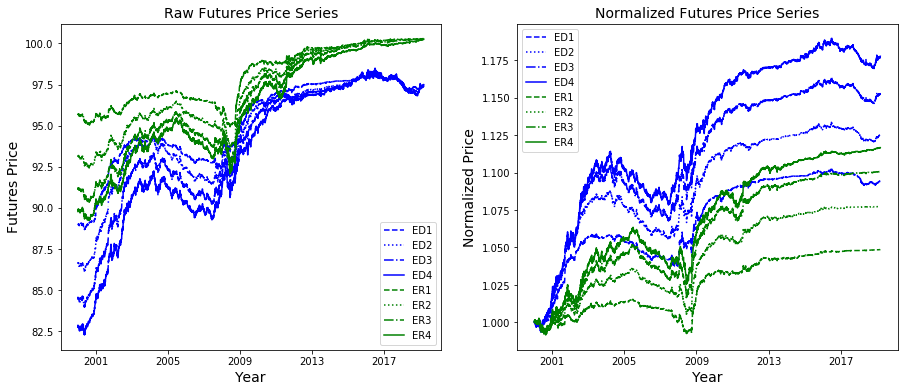

In [64]:
# Lets plot the data
import matplotlib.pyplot as plt

# Plot for raw time series
fig,ax = plt.subplots(1,2,figsize=(15,6))

# Raw futures price series
# ------------------------
# Eurodollars
ax[0].plot(price_data["ED1 Comdty"], ls = '--', color = 'blue', label = "ED1")
ax[0].plot(price_data["ED2 Comdty"], ls = ':' , color = 'blue', label = "ED2")
ax[0].plot(price_data["ED3 Comdty"], ls = '-.', color = 'blue', label = "ED3")
ax[0].plot(price_data["ED4 Comdty"], ls = '-' , color = 'blue', label = "ED4")
# Euribors
ax[0].plot(price_data["ER1 Comdty"], ls = '--', color = 'green', label = "ER1")
ax[0].plot(price_data["ER2 Comdty"], ls = ':' , color = 'green', label = "ER2")
ax[0].plot(price_data["ER3 Comdty"], ls = '-.', color = 'green', label = "ER3")
ax[0].plot(price_data["ER4 Comdty"], ls = '-' , color = 'green', label = "ER4")

ax[0].set_ylabel('Futures Price',fontsize=14)
ax[0].set_xlabel('Year',fontsize=14)
ax[0].set_title('Raw Futures Price Series',fontsize=14)
ax[0].legend(loc=4)

# Normalized futures price series
# ------------------------
# Eurodollars
ax[1].plot(price_data["ED1 Comdty"].div(price_data["ED1 Comdty"].iloc[0]), ls = '--', color = 'blue', label = "ED1")
ax[1].plot(price_data["ED2 Comdty"].div(price_data["ED2 Comdty"].iloc[0]), ls = ':' , color = 'blue', label = "ED2")
ax[1].plot(price_data["ED3 Comdty"].div(price_data["ED3 Comdty"].iloc[0]), ls = '-.', color = 'blue', label = "ED3")
ax[1].plot(price_data["ED4 Comdty"].div(price_data["ED4 Comdty"].iloc[0]), ls = '-' , color = 'blue', label = "ED4")
# Euribors
ax[1].plot(price_data["ER1 Comdty"].div(price_data["ER1 Comdty"].iloc[0]), ls = '--', color = 'green', label = "ER1")
ax[1].plot(price_data["ER2 Comdty"].div(price_data["ER2 Comdty"].iloc[0]), ls = ':' , color = 'green', label = "ER2")
ax[1].plot(price_data["ER3 Comdty"].div(price_data["ER3 Comdty"].iloc[0]), ls = '-.', color = 'green', label = "ER3")
ax[1].plot(price_data["ER4 Comdty"].div(price_data["ER4 Comdty"].iloc[0]), ls = '-' , color = 'green', label = "ER4")

ax[1].set_ylabel('Normalized Price',fontsize=14)
ax[1].set_xlabel('Year',fontsize=14)
ax[1].set_title('Normalized Futures Price Series',fontsize=14)
ax[1].legend(loc=2)


# Momentum Signal Definitions

The momentum signal for some asset $i$ is here defined as the simple average of scaled individual signals. The process of computing the scaled signals begins by first computing raw unscaled signals. These unscaled signals are then scaled using some normalization method.

# Signal 1:

The first signal that we test is simple average of realized Sharpe ratios. Each individual raw unscaled signal, $\tilde{s}_{i,w}(t)$, for asset $i$ and lookback $w$ is computed as the ratio of average of lagged $w$ returns, $\mu_{i,w}(t)$, divided by the standard deviation $\sigma(\mu_{i,w})(t)$. The average of lagged returns is:

$$\mu_{i,w}(t)=\frac{1}{w}\sum_{j=0}^{w}r_{i,t-j}$$

The problem with the raw signals $\mu_{i,w}(t)$ are that they have different variances and therefore they have different contributions to the final signal. In order to mitigate this problem we need to scale them to have similar variances. In the case of our first signal, the scaled signal is obtained by dividing the raw signal by its own 1250 day (approx. 5 trading years) standard deviation $\sigma_{1250}(\mu_{i,w})$, i.e.:

$$\tilde{s}_{i,w}(t)=Max\left(-1;Min\left(1;\frac{\mu_{i,w}(t)}{\sigma_{1250}(\mu_{i,w})(t)}\right)\right)$$

Additionally, we impose limits to the magnitude of signal such that $s_{i,w}(t) \in \left[ -1,1\right]$ to prohibit excessive positions. The final trading signal is then obtained by averaging the raw signals for each $w$:

$$s_i(t)=\sum_{j=1}^{3}s_{i,w_j}(t)$$


# Signal 2:
 
The second signal is computed like Signal 1 but we impose extra cutoff level of $\xi$. In other words - we trade only when the signal is strong enough.

$$s_{w}(t)=\left\{\begin{matrix}
s_{w}(t), \left | s_{w}(t) \right | \geq \xi \\ 
0
\end{matrix}\right.$$


# Signal 3:
Like signal 1 but with total returns.



# Signal 4:
Signal 4 is such that between +-20% proportional to signal, if over +-20% in absolute value the signal is +-100%.

$$s_{w}(t)=\left\{\begin{matrix}
+100\% , s_{w}(t) > 20\% \\ 
s_{w}(t) , \left| s_{w}(t) \right| \leq 20\% \\ 
-100\% , s_{w}(t) < -20\%
\end{matrix}\right.$$


# Signal 5:
Signal 5 is based on the cross over of short and longer exponentially weighted moving averages of the futures $\textit{prices}$. The algorithm building this signal involves several steps:

(a) Select 3 sets of time-scales with each set consisting of a short and a long ewmas.

(b) Here, we use the same specs as in MAN AHLs paper (link below). Let

$$S_k=\left( 8,16,32\right)$$
$$L_k=\left( 24,48,96\right)$$

These numbers are not look-back days or half-lifes but translate into EWMA decay factors $\lambda(n) = \frac{n-1}{n}$. So decay for the first short EWMA is $\lambda(S_1) = \frac{S_1-1}{S_1} = \frac{8-1}{8}$. Using this decay factor we compute the half-life of the EWMA:

$$HL(n) = \frac{log(0.5)}{log(\lambda(n))}$$

(c) Once we have obtained HLs for $S_k$ and $L_k$ we compute the cross over magnitudes $x_k$ in the usual manner:

$$x_k = EWMA\left(P|S_k\right) - EWMA\left(P|L_k\right)$$

where $P$ is the time-series for the price of the futures.

(d) The raw cross over signals $x_k$ is then normalized using a moving standard deviation of the $\textit{futures}$ $\textit{price}$ which is computed over 63-trading days:

$$y_k = \frac{x_k}{\sigma(P)_{63}}$$

Shameless plug warning:  https://www.cmegroup.com/education/files/dissecting-investment-strategies-in-the-cross-section-and-time-series.pdf

(e) The standardized signal $y_k$ is standardized again using its own standard deviation computed over 252 trading days:

$$z_k = \frac{y_k}{\sigma(y_k)_{252}}$$

(f) The final signal $s$ is obtained by averaging the three standardized signals:

$$s=\frac{1}{3}\sum_{k=1}^{3} z_k $$

(g) Finally, we truncate the signal $s\in \left[ -1;1\right]$


In [65]:
def signal_1(symbol,returns,return_lookback_windows,sigma_lookback_window):
    t = {}
    for w in return_lookback_windows:
        mu = returns.rolling(w).mean()
        s  = (mu.div(mu.rolling(sigma_lookback_window).std())).clip(-1,1)
        t.update({w:s.copy()})
    df = pd.DataFrame.from_dict(t,orient='columns').mean(axis=1)
    df.columns = [symbol]
    return df
    
def signal_2(symbol,returns,return_lookback_windows,sigma_lookback_window,cutoff):
    s_2 = signal_1(symbol,returns,return_lookback_windows,sigma_lookback_window)
    s_2[abs(s_2)<cutoff] = 0
    return s_2


def signal_3(symbol,price_data,return_lookback_windows,sigma_lookback_window):
    t = {}
    for w in return_lookback_windows:
        r_w   = price_data.pct_change(w)
        sigma = r_w.rolling(sigma_lookback_window).std()
        s     = (r_w.div(sigma)).clip(-1,1)
        t.update({w:s.copy()})
    df = pd.DataFrame.from_dict(t,orient='columns').mean(axis=1)
    df.columns = [symbol]        
    return df

def signal_4(symbol,returns,return_lookback_windows,sigma_lookback_window):
    t = {}
    for w in return_lookback_windows:
        mu    = returns.ewm(w).mean()   
        sigma = mu.ewm(sigma_lookback_window).std()
        s     = mu.div(sigma)
        s[s> 0.2] =  1
        s[s<-0.2] = -1
        t.update({w:s.copy()})
    df = pd.DataFrame.from_dict(t,orient='columns').mean(axis=1)
    df.columns = [symbol]      
    return df


def signal_5(symbol,price_data,shorter_windows,longer_windows):
    
    if(len(shorter_windows)!=len(longer_windows)):
        raise ValueError('Window lengths must be of equal size!')
    else:
        t = {}
        for i in range(0,len(shorter_windows)):
            n_s_k = shorter_windows[i]
            n_l_k = longer_windows[i]
            lamda_s_k = (n_s_k - 1)/float(n_s_k)
            lamda_l_k = (n_l_k - 1)/float(n_l_k)
            hl_s_k = np.log(0.5)/np.log(lamda_s_k)
            hl_l_k = np.log(0.5)/np.log(lamda_l_k)
            ewma_s_k = price_data.ewm(halflife=hl_s_k,ignore_na=True).mean()
            ewma_l_k = price_data.ewm(halflife=hl_l_k,ignore_na=True).mean()
            x_k = ewma_s_k - ewma_l_k
            y_k = x_k/price_data.ewm(63).std()
            z_k = (y_k/y_k.ewm(250).std()).clip(-1,1)
            t.update({f'{shorter_windows[i]}-{longer_windows[i]}':z_k})
        df = pd.DataFrame.from_dict(t,orient='columns').mean(axis=1)
        df.columns = [symbol]
        return df

In [66]:
# Return computation
ret = price_data.pct_change(1).fillna(0)

# We allocate dictionary for the signal dataframes
momentum_signals = {}

# Signal 1
t = {}
for symbol in symbols:
    mu_w    = index_specifications[symbol]["EWMA_window"]
    sigma_w = index_specifications[symbol]["Vol_window"]
    t.update({symbol:signal_1(symbol,ret[symbol],[mu_w],sigma_w)})
momentum_signals.update({"Signal_1":t})

# Signal 2
t = {}
for symbol in symbols:
    mu_w    = index_specifications[symbol]["EWMA_window"]
    sigma_w = index_specifications[symbol]["Vol_window"]    
    t.update({symbol:signal_2(symbol,ret[symbol],[mu_w],sigma_w,0.65)})
momentum_signals.update({"Signal_2":t})
    
# Signal 3 (Note: we pass price data here - not returns)
t = {}
for symbol in symbols:
    mu_w    = index_specifications[symbol]["EWMA_window"]
    sigma_w = index_specifications[symbol]["Vol_window"]    
    t.update({symbol:signal_3(symbol,price_data[symbol],[mu_w],sigma_w)})
momentum_signals.update({"Signal_3":t})

# Signal 4
t = {}
for symbol in symbols:
    mu_w    = index_specifications[symbol]["EWMA_window"]
    sigma_w = index_specifications[symbol]["Vol_window"]    
    t.update({symbol:signal_4(symbol,ret[symbol],[mu_w],sigma_w)})
momentum_signals.update({"Signal_4":t})

# Signal 5 (Note: we pass price data here - not returns)
t = {}
s_w = [8,16,32]
l_w = [24,48,96]
for symbol in symbols:
    t.update({symbol:signal_5(symbol,price_data[symbol],s_w,l_w)})
momentum_signals.update({"Signal_5":t})


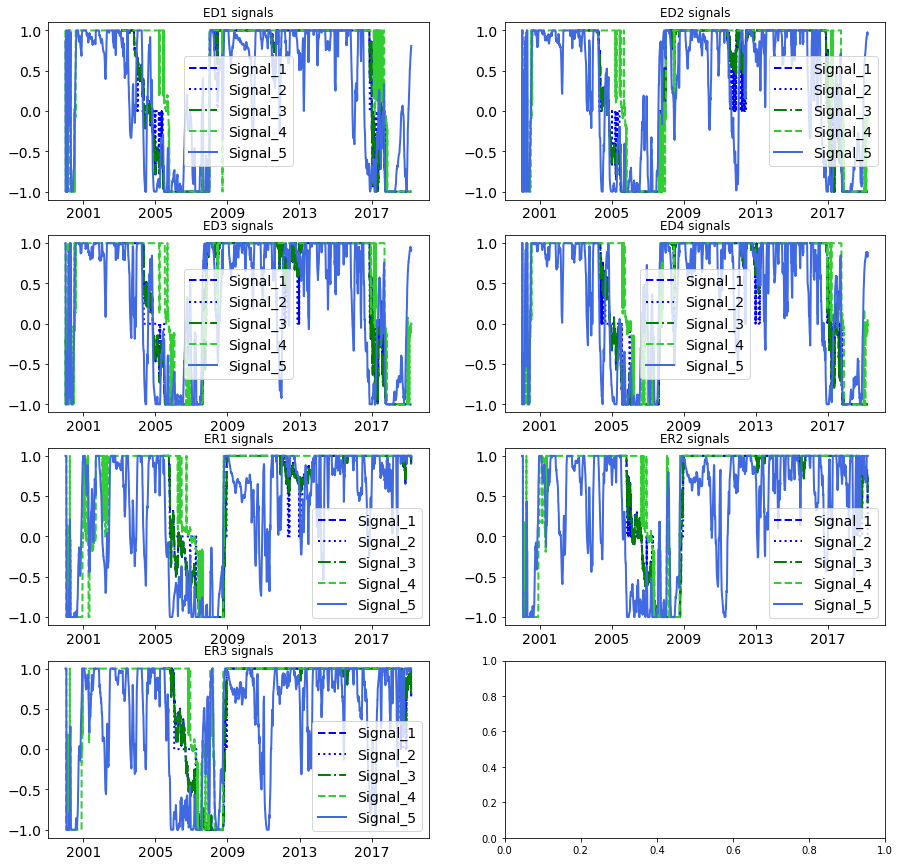

In [96]:
# Plot results
fig, ax = plt.subplots(4, 2, figsize=(15,15))

# Eurodollar futures signals
ax[0, 0].plot(momentum_signals["Signal_1"]['ED1 Comdty'], label = "Signal_1", color = 'blue' , ls = '--', lw = 2)
ax[0, 0].plot(momentum_signals["Signal_2"]['ED1 Comdty'], label = "Signal_2", color = 'blue' , ls = ':' , lw = 2)
ax[0, 0].plot(momentum_signals["Signal_3"]['ED1 Comdty'], label = "Signal_3", color = 'green' , ls = '-.', lw = 2)
ax[0, 0].plot(momentum_signals["Signal_4"]['ED1 Comdty'], label = "Signal_4", color = 'limegreen'  , ls = '--', lw = 2)
ax[0, 0].plot(momentum_signals["Signal_5"]['ED1 Comdty'], label = "Signal_5", color = 'royalblue'  , ls = '-' , lw = 2)
ax[0, 0].set_title(f"ED1 signals" )
ax[0, 0].legend(fontsize=14)
ax[0, 0].xaxis.set_tick_params(labelsize=14)
ax[0, 0].yaxis.set_tick_params(labelsize=14)

ax[0, 1].plot(momentum_signals["Signal_1"]['ED2 Comdty'], label = "Signal_1", color = 'blue' , ls = '--', lw = 2)
ax[0, 1].plot(momentum_signals["Signal_2"]['ED2 Comdty'], label = "Signal_2", color = 'blue' , ls = ':' , lw = 2)
ax[0, 1].plot(momentum_signals["Signal_3"]['ED2 Comdty'], label = "Signal_3", color = 'green' , ls = '-.', lw = 2)
ax[0, 1].plot(momentum_signals["Signal_4"]['ED2 Comdty'], label = "Signal_4", color = 'limegreen'  , ls = '--', lw = 2)
ax[0, 1].plot(momentum_signals["Signal_5"]['ED2 Comdty'], label = "Signal_5", color = 'royalblue'  , ls = '-' , lw = 2)
ax[0, 1].set_title(f"ED2 signals" )
ax[0, 1].legend(fontsize=14)
ax[0, 1].xaxis.set_tick_params(labelsize=14)
ax[0, 1].yaxis.set_tick_params(labelsize=14)

ax[1, 0].plot(momentum_signals["Signal_1"]['ED3 Comdty'], label = "Signal_1", color = 'blue' , ls = '--', lw = 2)
ax[1, 0].plot(momentum_signals["Signal_2"]['ED3 Comdty'], label = "Signal_2", color = 'blue' , ls = ':' , lw = 2)
ax[1, 0].plot(momentum_signals["Signal_3"]['ED3 Comdty'], label = "Signal_3", color = 'green' , ls = '-.', lw = 2)
ax[1, 0].plot(momentum_signals["Signal_4"]['ED3 Comdty'], label = "Signal_4", color = 'limegreen'  , ls = '--', lw = 2)
ax[1, 0].plot(momentum_signals["Signal_5"]['ED3 Comdty'], label = "Signal_5", color = 'royalblue'  , ls = '-' , lw = 2)
ax[1, 0].set_title(f"ED3 signals" )
ax[1, 0].legend(fontsize=14)
ax[1, 0].xaxis.set_tick_params(labelsize=14)
ax[1, 0].yaxis.set_tick_params(labelsize=14)

ax[1, 1].plot(momentum_signals["Signal_1"]['ED4 Comdty'], label = "Signal_1", color = 'blue' , ls = '--', lw = 2)
ax[1, 1].plot(momentum_signals["Signal_2"]['ED4 Comdty'], label = "Signal_2", color = 'blue' , ls = ':' , lw = 2)
ax[1, 1].plot(momentum_signals["Signal_3"]['ED4 Comdty'], label = "Signal_3", color = 'green' , ls = '-.', lw = 2)
ax[1, 1].plot(momentum_signals["Signal_4"]['ED4 Comdty'], label = "Signal_4", color = 'limegreen'  , ls = '--', lw = 2)
ax[1, 1].plot(momentum_signals["Signal_5"]['ED4 Comdty'], label = "Signal_5", color = 'royalblue'  , ls = '-' , lw = 2)
ax[1, 1].set_title(f"ED4 signals" )
ax[1, 1].legend(fontsize=14)
ax[1, 1].xaxis.set_tick_params(labelsize=14)
ax[1, 1].yaxis.set_tick_params(labelsize=14)

# Euribor futures signals
ax[2, 0].plot(momentum_signals["Signal_1"]['ER1 Comdty'], label = "Signal_1", color = 'blue' , ls = '--', lw = 2)
ax[2, 0].plot(momentum_signals["Signal_2"]['ER1 Comdty'], label = "Signal_2", color = 'blue' , ls = ':' , lw = 2)
ax[2, 0].plot(momentum_signals["Signal_3"]['ER1 Comdty'], label = "Signal_3", color = 'green' , ls = '-.', lw = 2)
ax[2, 0].plot(momentum_signals["Signal_4"]['ER1 Comdty'], label = "Signal_4", color = 'limegreen'  , ls = '--', lw = 2)
ax[2, 0].plot(momentum_signals["Signal_5"]['ER1 Comdty'], label = "Signal_5", color = 'royalblue'  , ls = '-' , lw = 2)
ax[2, 0].set_title(f"ER1 signals" )
ax[2, 0].legend(fontsize=14)
ax[2, 0].xaxis.set_tick_params(labelsize=14)
ax[2, 0].yaxis.set_tick_params(labelsize=14)

ax[2, 1].plot(momentum_signals["Signal_1"]['ER2 Comdty'], label = "Signal_1", color = 'blue' , ls = '--', lw = 2)
ax[2, 1].plot(momentum_signals["Signal_2"]['ER2 Comdty'], label = "Signal_2", color = 'blue' , ls = ':' , lw = 2)
ax[2, 1].plot(momentum_signals["Signal_3"]['ER2 Comdty'], label = "Signal_3", color = 'green' , ls = '-.', lw = 2)
ax[2, 1].plot(momentum_signals["Signal_4"]['ER2 Comdty'], label = "Signal_4", color = 'limegreen'  , ls = '--', lw = 2)
ax[2, 1].plot(momentum_signals["Signal_5"]['ER2 Comdty'], label = "Signal_5", color = 'royalblue'  , ls = '-' , lw = 2)
ax[2, 1].set_title(f"ER2 signals" )
ax[2, 1].legend(fontsize=14)
ax[2, 1].xaxis.set_tick_params(labelsize=14)
ax[2, 1].yaxis.set_tick_params(labelsize=14)

ax[3, 0].plot(momentum_signals["Signal_1"]['ER3 Comdty'], label = "Signal_1", color = 'blue' , ls = '--', lw = 2)
ax[3, 0].plot(momentum_signals["Signal_2"]['ER3 Comdty'], label = "Signal_2", color = 'blue' , ls = ':' , lw = 2)
ax[3, 0].plot(momentum_signals["Signal_3"]['ER3 Comdty'], label = "Signal_3", color = 'green' , ls = '-.', lw = 2)
ax[3, 0].plot(momentum_signals["Signal_4"]['ER3 Comdty'], label = "Signal_4", color = 'limegreen'  , ls = '--', lw = 2)
ax[3, 0].plot(momentum_signals["Signal_5"]['ER3 Comdty'], label = "Signal_5", color = 'royalblue'  , ls = '-' , lw = 2)
ax[3, 0].set_title(f"ER3 signals" )
ax[3, 0].legend(fontsize=14)
ax[3, 0].xaxis.set_tick_params(labelsize=14)
ax[3, 0].yaxis.set_tick_params(labelsize=14)

ax[3, 1].plot(momentum_signals["Signal_1"]['ER4 Comdty'], label = "Signal_1", color = 'blue' , ls = '--', lw = 2)
ax[3, 1].plot(momentum_signals["Signal_2"]['ER4 Comdty'], label = "Signal_2", color = 'blue' , ls = ':' , lw = 2)
ax[3, 1].plot(momentum_signals["Signal_3"]['ER4 Comdty'], label = "Signal_3", color = 'green' , ls = '-.', lw = 2)
ax[3, 1].plot(momentum_signals["Signal_4"]['ER4 Comdty'], label = "Signal_4", color = 'limegreen'  , ls = '--', lw = 2)
ax[3, 1].plot(momentum_signals["Signal_5"]['ER4 Comdty'], label = "Signal_5", color = 'royalblue'  , ls = '-' , lw = 2)
ax[3, 1].set_title(f"ER4 signals" )
ax[3, 1].legend(fontsize=14)
ax[3, 1].xaxis.set_tick_params(labelsize=14)
ax[3, 1].yaxis.set_tick_params(labelsize=14)

# Volatility Scaling:
The next thing we need is the volatility scaling mechanism. The idea behind this is that since the time-series for volatility have strong auto-correlation then it is possible to create locally constant volatility time series using a clever weighting scheme:

$$L_{\sigma}(t)=Min\left[ Cap; \frac{\sigma_T}{\sigma_R(t)} \right]$$

where $\sigma_T$ is our target volatility which is here set to 10\% p.a. and $\sigma_R$ is the realized volatility in annualized terms. Here we use 63 window to calculate the realized volatility. However, the window can be anything you want. The term $Cap$ is the maximum leverage cap we impose to our volatility imposed leverage. Here se set $Cap=1$. However, this cap can be anything you want.


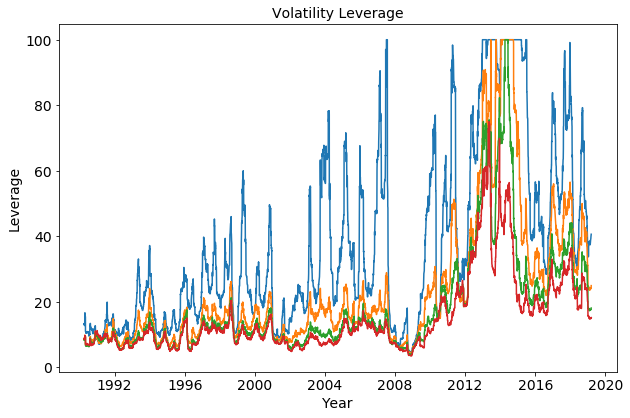

In [20]:
# Target volatility (per annum)
target_volatility = 0.10

# volatility window
sigma_window = 63

# Lets compute the volatility leverages for each individual underlying
L_sigmas = {}
for k,v in index_specifications.items():
    symbol        = index_specifications[k]['Symbol']
    vol_scale_cap = index_specifications[k]['Vol_Scale_Cap']
    L_sigma       = target_volatility/(ret[symbol].rolling(sigma_window).std().dropna()*np.sqrt(250))
    L_sigma       = L_sigma.clip(0,vol_scale_cap)
    L_sigmas.update({symbol:L_sigma})
L_sigmas = pd.DataFrame.from_dict(L_sigmas,orient='columns')
    
fig = plt.figure(figsize=(10,6.4))
plt.plot(L_sigmas)
plt.ylabel('Leverage',fontsize=14)
plt.xlabel('Year',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title(f'Volatility Leverage',fontsize=14)
plt.show()



# Backtesting Methodology:





# Nominal exposure from signal:
Now we are ready to compute the historical backtest of the strategy. Here the position is determined by the product of trading signal and the volatility leverage. That is, the total exposure in asset $i$ at time $t$, $E_{i}(t)$ is defined as:

$$E_{i}(t):=L_{i,\sigma}(t)s_i(t)$$

# Monthly rebalancing:

Here we use $\textit{monthly rebalancing}$, and therefore, we need to resample the daily trading signal on a monthly basis. More specifically, we create a set of rebalancing dates $\{t^{*}\}$. Then we take the signals for these dates $s_i(\{t^{*}\})$. The effective signal is then the signal from the immdetiately previous rebalancing date. Concretely, the effective signal, $s_i^{E}(t)$ series is:

$$s_i^{E}(t) = \left \{ s_i(t_1^{*}),\cdots ,s_i(t_1^{*}),s_i(t_2^{*}),\cdots ,s_i(t_2^{*}),\cdots,s_i(t_N^{*}),\cdots ,s_i(t_N^{*})  \right \}$$

where $t_1^{*}$ is the first rebalancing date and $t_N^{*}$ is the last rebalancing date. We compute the effective volatility leverage, $L_{i,\sigma}^{E}(t)$ using the same rebalancing dates and apply similar sparse sampling logic.

The monthly rebalanced exposure to asset $i$ at time $t$ is then given by:

$$E_{i}^{E}(t)=L_{i,\sigma}^{E}(t)s_i^{E}(t)$$

# Return computation:

Then the return on the position is computed using the effective exposure:

$$r_{i}(t) = E_{i}^{E}(t-1)r_i^{F}(t) $$

where $r_i^{F}(t)$ is the futures contract return.


# Signal 1 Performance

In [1]:
# Compute strategy returns using Signal 1
tested_signal_name = "Signal_1"
performances = {}
for signal_type,signal_data in momentum_signals.items():
    performance = {}
    for symbol in signal_data.keys():
        s           = pd.DataFrame.from_dict(momentum_signals[tested_signal_name][symbol]).mean(axis=1)
        rebal_dates = pd.date_range(start_date,end_date,freq='M')
        s_at_rebal  = s.loc[rebal_dates]
        l_at_rebal  = L_sigmas[symbol].loc[rebal_dates]
        
        effective_signal = s_at_rebal.reindex(s.index).fillna(method='ffill')
        effective_lever  = l_at_rebal.reindex(s.index).fillna(method='ffill')
        
        exposure = (effective_lever.shift(1)*effective_signal.shift(1)).fillna(0)
        returns  = ret[symbol]*exposure
        returns.columns = [symbol]
        performance.update({symbol:returns.copy()})
    performances.update({signal_type:performance})

signal_1_performance = pd.DataFrame.from_dict(performances[tested_signal_name],orient='columns').fillna(0)
        
fig_size  = (15,10)
font_size = 14

fig = plt.figure(figsize=fig_size)
for symbol in signal_1_performance.columns:
    plt.plot(signal_1_performance[symbol].cumsum(),label = symbol)
plt.ylabel('Performance',fontsize = font_size)
plt.xlabel('Year'       ,fontsize = font_size)
plt.xticks(fontsize = font_size)
plt.yticks(fontsize = font_size)
plt.legend(fontsize = font_size)
plt.title(f'Performance per underlying',fontsize = font_size)
plt.show()

benchmark_returns = benchmark_data['JHLXH3US Index'].pct_change(1)
signal_1_returns  = signal_1_performance.loc[benchmark_returns.index].mean(axis=1)

#y_1 = np.cumprod(1+benchmark_returns)
#y_2 = np.cumprod(1+signal_1_returns)


#fig = plt.figure(figsize=fig_size)
#plt.plot(y_1, color = 'blue' , label = 'JHLXH3US Index')
#plt.plot(y_2, color = 'green', label = 'Replicated')
#plt.ylabel('Performance',fontsize=14)
#plt.xlabel('Year',fontsize=14)
#plt.xticks(fontsize = 14)
#plt.yticks(fontsize = 14)
#plt.legend(fontsize = 14)
#plt.title(f"'JHLXH3US Index' VS {tested_signal_name}",fontsize=14)
#plt.show()



f, ax = plt.subplots(2,2, figsize=(14,12))    
ax[0,0].plot(signal_1_returns.cumsum(), color = 'blue', label = f'Replicated {signal_name}')
ax[0,0].plot(benchmark_returns.cumsum()        , color = 'red' , label = 'Benchmark')
ax[0,0].set_ylabel('Cumulative performance', fontsize=14)
ax[0,0].set_title('Historical Performance', fontsize=14)
ax[0,0].legend()

sns.distplot(signal_1_returns.values, ax = ax[0,1], color = 'blue', label = f'Replicated {signal_name}')
sns.distplot(benchmark_returns.values        , ax = ax[0,1], color = 'red' , label = 'Benchmark' )
ax[0,1].set_ylabel('Frequency', fontsize=14)
ax[0,1].set_xlabel('Daily return', fontsize=14)
ax[0,1].set_title('Estimated Kernel Densities', fontsize=14)
ax[0,1].legend()


x_data = benchmark_returns
y_data = signal_1_returns.loc[x_data.index].fillna(0)

sns.regplot(x = x_data.values, y = y_data.values, ax = ax[1,0], color = 'blue' )
ax[1,0].set_ylabel(f'Return - Replicated {signal_name}', fontsize=14)
ax[1,0].set_xlabel(f'Return - Benchmark', fontsize=14)
ax[1,0].set_title(r'$Regression: r_{Benchmark} = \beta_0 + \beta_1 r_{Replicated}$', fontsize=14)


percs = np.linspace(0,100,21)
qn_a  = np.percentile(x_data.values, percs)
qn_b  = np.percentile(y_data.values, percs)
x     = np.linspace(np.min((qn_a.min(),qn_b.min())), np.max((qn_a.max(),qn_b.max())))
ax[1,1].plot(x,x, color="k", ls="--")
ax[1,1].scatter(qn_a,qn_b, marker="o", color = 'blue')
ax[1,1].set_ylabel(f'Quantile - Replicated {signal_name}', fontsize=14)
ax[1,1].set_xlabel(f'Quantile - Benchmark', fontsize=14)
ax[1,1].set_title('Q-Q', fontsize=14)






NameError: name 'momentum_signals' is not defined

# Signal 2 Performance

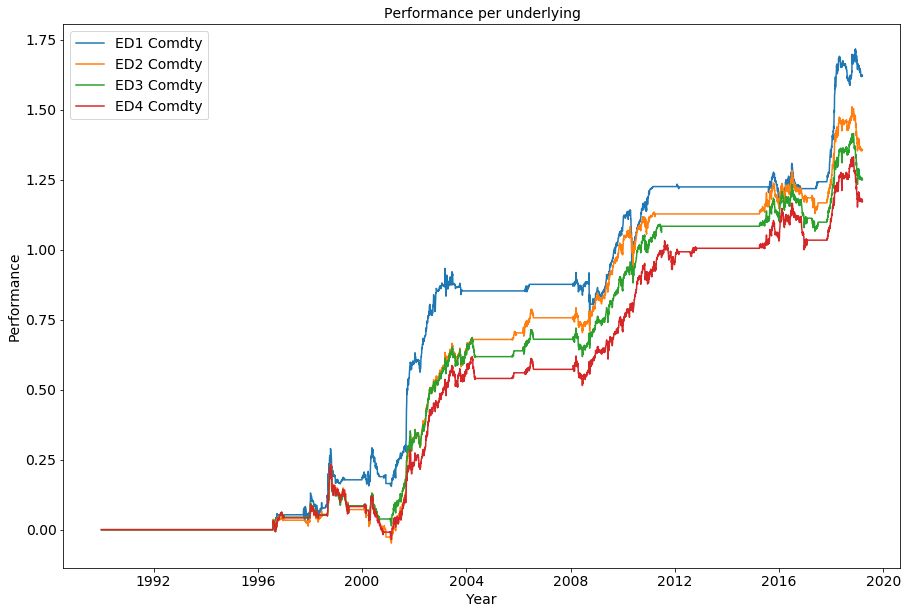

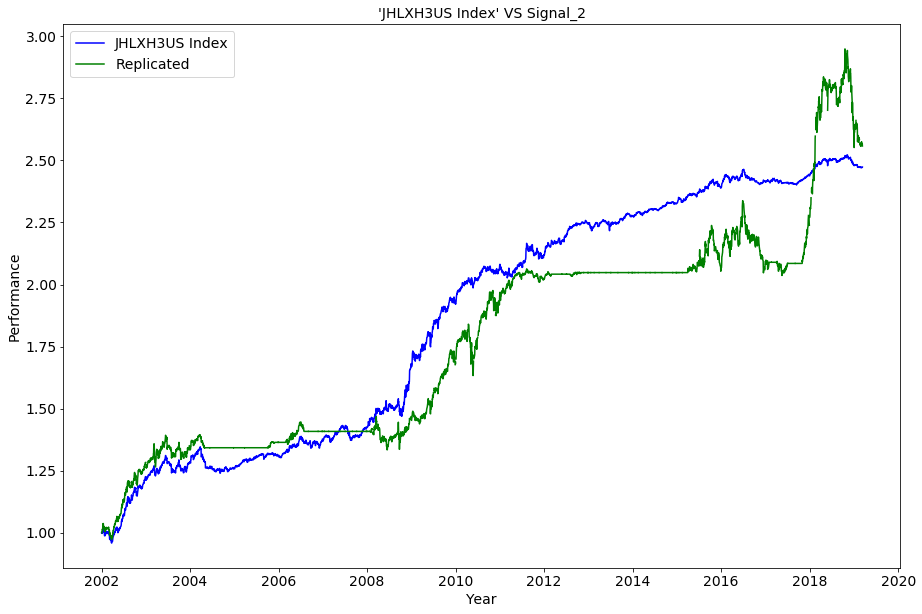

In [28]:
# Compute strategy returns using Signal 2
tested_signal_name = "Signal_2"
performances = {}
for signal_type,signal_data in momentum_signals.items():
    performance = {}
    for symbol in signal_data.keys():
        s           = pd.DataFrame.from_dict(momentum_signals[tested_signal_name][symbol]).mean(axis=1)
        rebal_dates = pd.date_range(start_date,end_date,freq='M')
        s_at_rebal  = s.loc[rebal_dates]
        l_at_rebal  = L_sigmas[symbol].loc[rebal_dates]
        
        effective_signal = s_at_rebal.reindex(s.index).fillna(method='ffill')
        effective_lever  = l_at_rebal.reindex(s.index).fillna(method='ffill')
        
        exposure = (effective_lever.shift(1)*effective_signal.shift(1)).fillna(0)
        returns  = ret[symbol]*exposure
        returns.columns = [symbol]
        performance.update({symbol:returns.copy()})
    performances.update({signal_type:performance})

signal_2_performance = pd.DataFrame.from_dict(performances[tested_signal_name],orient='columns').fillna(0)
        
fig_size  = (15,10)
font_size = 14

fig = plt.figure(figsize=fig_size)
for symbol in signal_2_performance.columns:
    plt.plot(signal_2_performance[symbol].cumsum(),label = symbol)
plt.ylabel('Performance',fontsize = font_size)
plt.xlabel('Year'       ,fontsize = font_size)
plt.xticks(fontsize = font_size)
plt.yticks(fontsize = font_size)
plt.legend(fontsize = font_size)
plt.title(f'Performance per underlying',fontsize = font_size)
plt.show()

benchmark_returns = benchmark_data['JHLXH3US Index'].pct_change(1)
signal_2_returns  = signal_2_performance.loc[benchmark_returns.index].mean(axis=1)

y_1 = np.cumprod(1+benchmark_returns)
y_2 = np.cumprod(1+signal_2_returns)


fig = plt.figure(figsize=fig_size)
plt.plot(y_1, color = 'blue' , label = 'JHLXH3US Index')
plt.plot(y_2, color = 'green', label = 'Replicated')
plt.ylabel('Performance',fontsize=14)
plt.xlabel('Year',fontsize=14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend(fontsize = 14)
plt.title(f"'JHLXH3US Index' VS {tested_signal_name}",fontsize=14)
plt.show()


# Signal 3 Performance

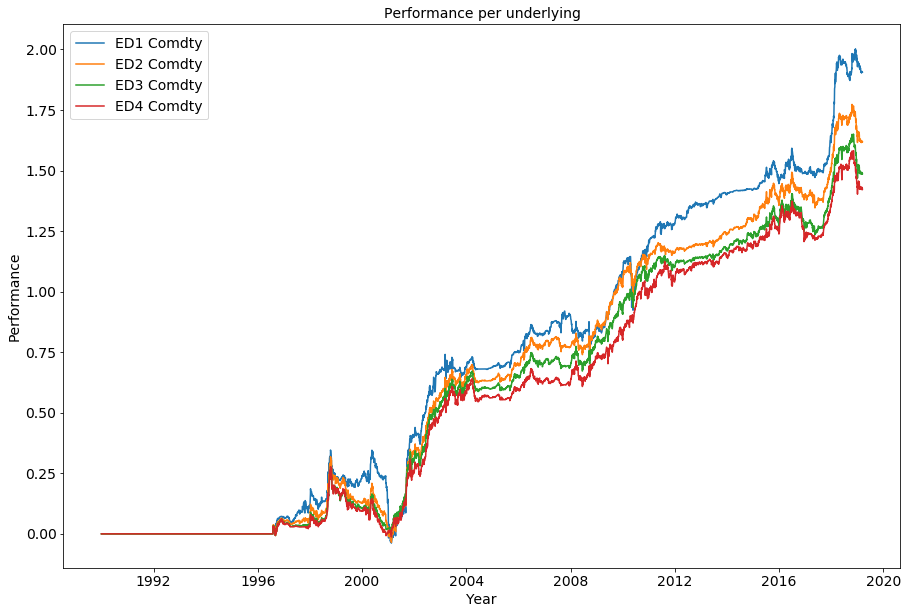

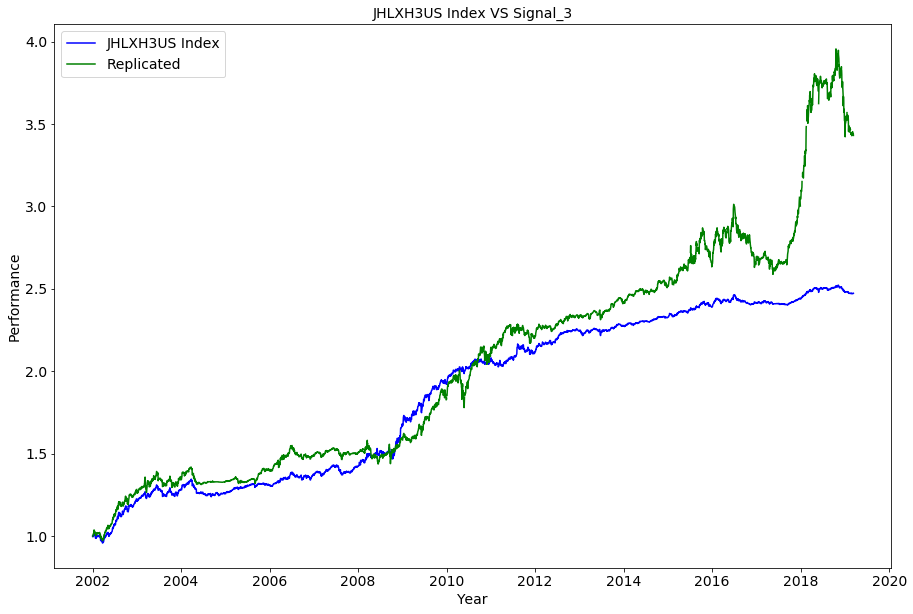

In [29]:
# Compute strategy returns using Signal 3
tested_signal_name = "Signal_3"
performances = {}
for signal_type,signal_data in momentum_signals.items():
    performance = {}
    for symbol in signal_data.keys():
        s           = pd.DataFrame.from_dict(momentum_signals[tested_signal_name][symbol]).mean(axis=1)
        rebal_dates = pd.date_range(start_date,end_date,freq='M')
        s_at_rebal  = s.loc[rebal_dates]
        l_at_rebal  = L_sigmas[symbol].loc[rebal_dates]
        
        effective_signal = s_at_rebal.reindex(s.index).fillna(method='ffill')
        effective_lever  = l_at_rebal.reindex(s.index).fillna(method='ffill')
        
        exposure = (effective_lever.shift(1)*effective_signal.shift(1)).fillna(0)
        returns  = ret[symbol]*exposure
        returns.columns = [symbol]
        performance.update({symbol:returns.copy()})
    performances.update({signal_type:performance})

signal_3_performance = pd.DataFrame.from_dict(performances[tested_signal_name],orient='columns').fillna(0)
        

fig_size  = (15,10)
font_size = 14

fig = plt.figure(figsize=fig_size)
for symbol in signal_3_performance.columns:
    plt.plot(signal_3_performance[symbol].cumsum(),label = symbol)
plt.ylabel('Performance',fontsize = font_size)
plt.xlabel('Year'       ,fontsize = font_size)
plt.xticks(fontsize = font_size)
plt.yticks(fontsize = font_size)
plt.legend(fontsize = font_size)
plt.title(f'Performance per underlying',fontsize = font_size)
plt.show()

benchmark_returns = benchmark_data['JHLXH3US Index'].pct_change(1)
signal_3_returns  = signal_3_performance.loc[benchmark_returns.index].mean(axis=1)

y_1 = np.cumprod(1+benchmark_returns)
y_2 = np.cumprod(1+signal_3_returns)


fig = plt.figure(figsize=fig_size)
plt.plot(y_1, color = 'blue' , label = 'JHLXH3US Index')
plt.plot(y_2, color = 'green', label = 'Replicated')
plt.ylabel('Performance',fontsize=14)
plt.xlabel('Year',fontsize=14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend(fontsize = 14)
plt.title(f"JHLXH3US Index VS {tested_signal_name}",fontsize=14)
plt.show()


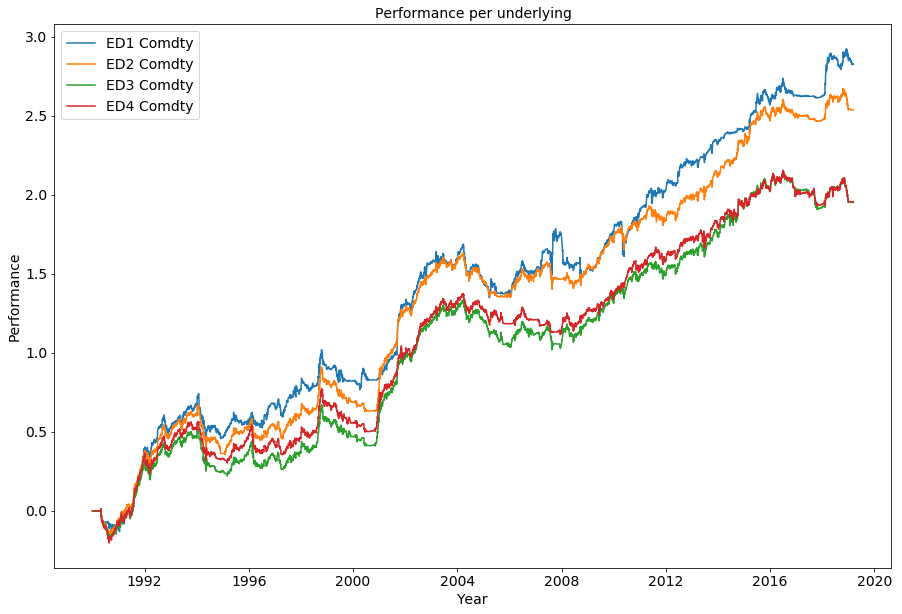

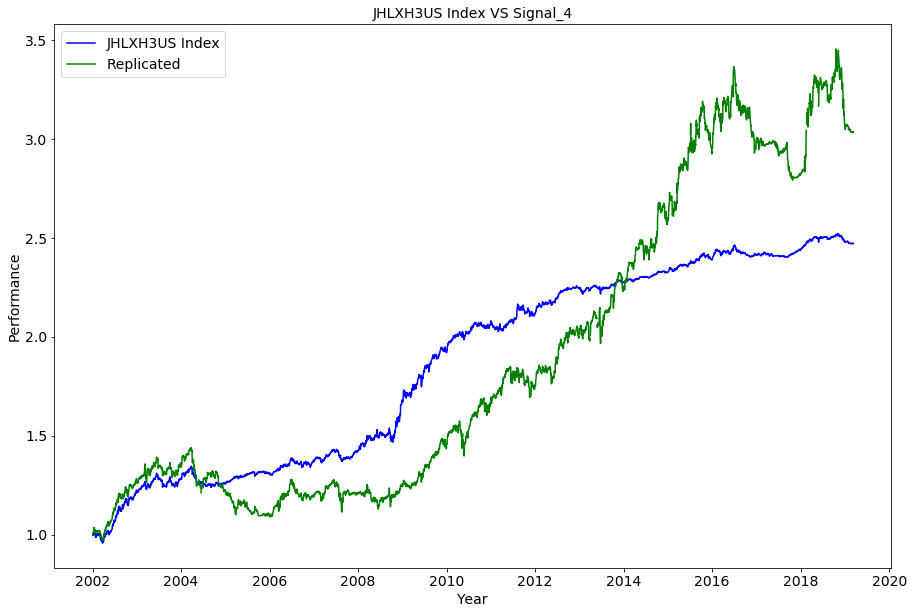

In [32]:
# Compute strategy returns using Signal 4
tested_signal_name = "Signal_4"
performances = {}
for signal_type,signal_data in momentum_signals.items():
    performance = {}
    for symbol in signal_data.keys():
        s           = pd.DataFrame.from_dict(momentum_signals[tested_signal_name][symbol]).mean(axis=1)
        rebal_dates = pd.date_range(start_date,end_date,freq='M')
        s_at_rebal  = s.loc[rebal_dates]
        l_at_rebal  = L_sigmas[symbol].loc[rebal_dates]
        
        effective_signal = s_at_rebal.reindex(s.index).fillna(method='ffill')
        effective_lever  = l_at_rebal.reindex(s.index).fillna(method='ffill')
        
        exposure = (effective_lever.shift(1)*effective_signal.shift(1)).fillna(0)
        returns  = ret[symbol]*exposure
        returns.columns = [symbol]
        performance.update({symbol:returns.copy()})
    performances.update({signal_type:performance})

signal_4_performance = pd.DataFrame.from_dict(performances[tested_signal_name],orient='columns').fillna(0)
        

fig_size  = (15,10)
font_size = 14

fig = plt.figure(figsize=fig_size)
for symbol in signal_4_performance.columns:
    plt.plot(signal_4_performance[symbol].cumsum(),label = symbol)
plt.ylabel('Performance',fontsize = font_size)
plt.xlabel('Year'       ,fontsize = font_size)
plt.xticks(fontsize = font_size)
plt.yticks(fontsize = font_size)
plt.legend(fontsize = font_size)
plt.title(f'Performance per underlying',fontsize = font_size)
plt.show()

benchmark_returns = benchmark_data['JHLXH3US Index'].pct_change(1)
signal_4_returns  = signal_4_performance.loc[benchmark_returns.index].mean(axis=1)

y_1 = np.cumprod(1+benchmark_returns)
y_2 = np.cumprod(1+signal_4_returns)


fig = plt.figure(figsize=fig_size)
plt.plot(y_1, color = 'blue' , label = 'JHLXH3US Index')
plt.plot(y_2, color = 'green', label = 'Replicated')
plt.ylabel('Performance',fontsize=14)
plt.xlabel('Year',fontsize=14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend(fontsize = 14)
plt.title(f"JHLXH3US Index VS {tested_signal_name}",fontsize=14)
plt.show()


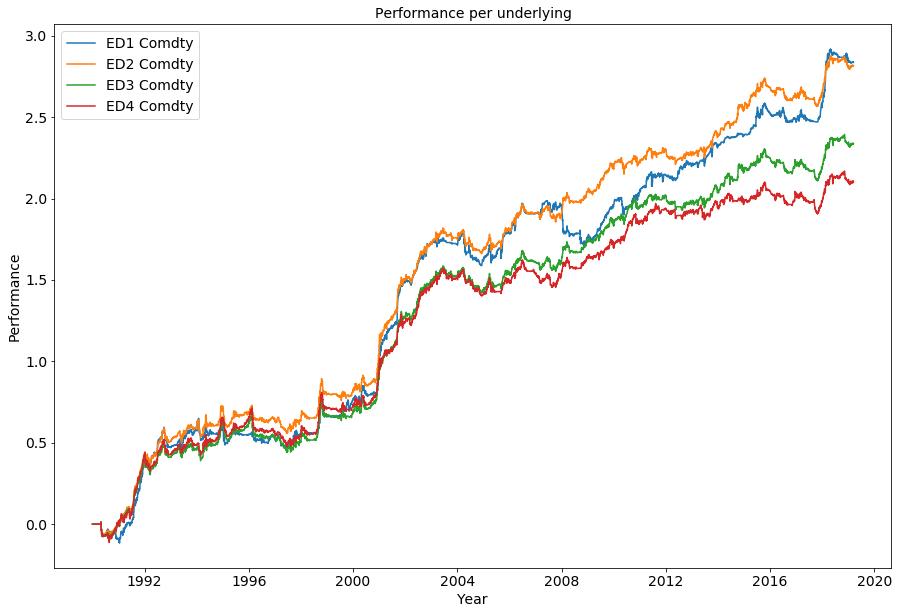

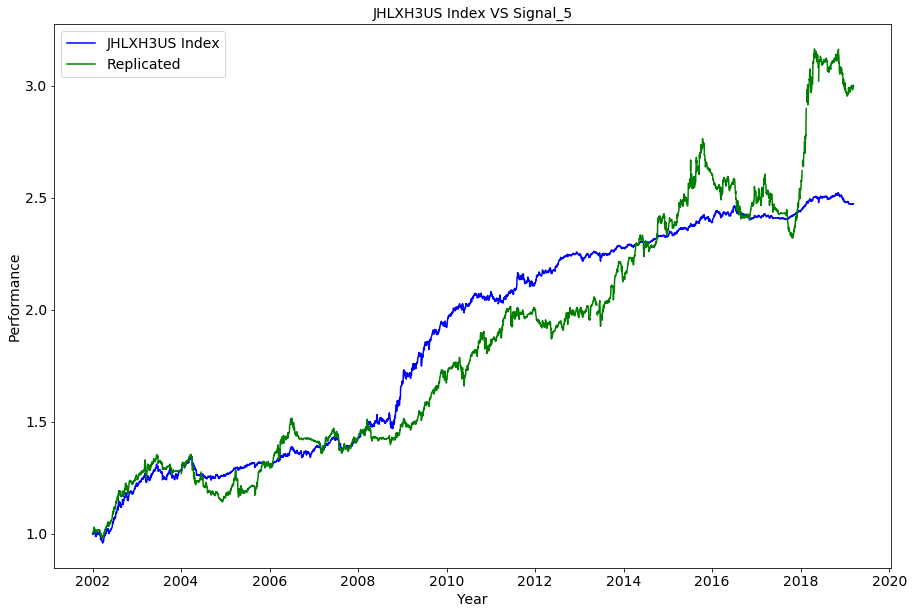

In [23]:
# Compute strategy returns using Signal 5
tested_signal_name = "Signal_5"
performances = {}
for signal_type,signal_data in momentum_signals.items():
    performance = {}
    for symbol in signal_data.keys():
        s           = pd.DataFrame.from_dict(momentum_signals[tested_signal_name][symbol]).mean(axis=1)
        rebal_dates = pd.date_range(start_date,end_date,freq='M')
        s_at_rebal  = s.loc[rebal_dates]
        l_at_rebal  = L_sigmas[symbol].loc[rebal_dates]
        
        effective_signal = s_at_rebal.reindex(s.index).fillna(method='ffill')
        effective_lever  = l_at_rebal.reindex(s.index).fillna(method='ffill')
        
        exposure = (effective_lever.shift(1)*effective_signal.shift(1)).fillna(0)
        returns  = ret[symbol]*exposure
        returns.columns = [symbol]
        performance.update({symbol:returns.copy()})
    performances.update({signal_type:performance})

signal_5_performance = pd.DataFrame.from_dict(performances[tested_signal_name],orient='columns').fillna(0)
        

fig_size  = (15,10)
font_size = 14

fig = plt.figure(figsize=fig_size)
for symbol in signal_5_performance.columns:
    plt.plot(signal_5_performance[symbol].cumsum(),label = symbol)
plt.ylabel('Performance',fontsize = font_size)
plt.xlabel('Year'       ,fontsize = font_size)
plt.xticks(fontsize = font_size)
plt.yticks(fontsize = font_size)
plt.legend(fontsize = font_size)
plt.title(f'Performance per underlying',fontsize = font_size)
plt.show()

benchmark_returns = benchmark_data['JHLXH3US Index'].pct_change(1)
signal_5_returns  = signal_5_performance.loc[benchmark_returns.index].mean(axis=1)

y_1 = np.cumprod(1+benchmark_returns)
y_2 = np.cumprod(1+signal_5_returns)


fig = plt.figure(figsize=fig_size)
plt.plot(y_1, color = 'blue' , label = 'JHLXH3US Index')
plt.plot(y_2, color = 'green', label = 'Replicated')
plt.ylabel('Performance',fontsize=14)
plt.xlabel('Year',fontsize=14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend(fontsize = 14)
plt.title(f"JHLXH3US Index VS {tested_signal_name}",fontsize=14)
plt.show()

# Performance Statistics

In [30]:
from scipy.stats import skew,kurtosis

def compute_statistics(returns):

    # For maximum drawdown we need compounded return series (not strictly correct but hey whatever)
    xs = (1.0 + returns).cumprod()
    
    start_date = xs.head(1).index[0]
    end_date   = xs.tail(1).index[0]
    years      = (end_date - start_date).days/365
    
    # Sample mean
    mu_avg  = returns.mean()*252
    
    # Cumulative aggregate growth rate
    mu_cagr = (xs.tail(1).values[0]/xs.head(1).values[0])**(1.0/years)-1.0
    
    # End of maximum drawdown
    i       = np.argmax(np.maximum.accumulate(xs) - xs) 
    
    # Start of maximum drawdown
    j       = np.argmax(xs[:i])
    
    # Magnitude of maximum drawdown
    max_dd  = (xs[i] - xs[j])/xs[j]
    
    # Volatility of the returns
    vol     = returns.std()*np.sqrt(250)
     
    # Sharpe ratio    
    sharpe  = mu_cagr/vol
    
    result = {}
    
    result.update({'Average_return' :round(100.0*mu_avg ,2) })
    result.update({'CAGR'           :round(100.0*mu_cagr,2) })
    result.update({'Volatility'     :round(100.0*vol,2)     })
    result.update({'Sharpe'         :round(mu_cagr/vol,2)   })
    result.update({'MaxDD'          :round(100.0*max_dd,2)  })
    result.update({'CalmarRatioAvg' :round(mu_avg  / abs(max_dd),3) })
    result.update({'CalmarRatioCAGR':round(mu_cagr / abs(max_dd),3) })
    result.update({'MaxDDperVol'    :round(max_dd/vol,2)               })
    result.update({'Skew'           :round(skew(xs),2)                 })
    result.update({'ExcessKurtosis' :round(kurtosis(xs,fisher=True),2) })
    
    return result


In [33]:
signal_1_statistics  = compute_statistics(signal_1_returns.dropna())
signal_2_statistics  = compute_statistics(signal_2_returns.dropna())
signal_3_statistics  = compute_statistics(signal_3_returns.dropna())
signal_4_statistics  = compute_statistics(signal_4_returns.dropna())
signal_5_statistics  = compute_statistics(signal_5_returns.dropna())
#benchmark_statistics = compute_statistics(benchmark_returns.dropna())


df_1  = pd.DataFrame.from_dict(signal_1_statistics  , orient='index', columns=['Signal 1'])
df_2  = pd.DataFrame.from_dict(signal_2_statistics  , orient='index', columns=['Signal 2'])
df_3  = pd.DataFrame.from_dict(signal_3_statistics  , orient='index', columns=['Signal 3'])
df_4  = pd.DataFrame.from_dict(signal_4_statistics  , orient='index', columns=['Signal 4'])
df_5  = pd.DataFrame.from_dict(signal_5_statistics  , orient='index', columns=['Signal 5'])

#df_bm = pd.DataFrame.from_dict(benchmark_statistics , orient='index', columns=['NMEDMG3E Index'])

summary = pd.concat([df_1,df_2,df_3,df_4,df_5],axis=1)

print(summary)

                 Signal 1  Signal 2  Signal 3  Signal 4  Signal 5
Average_return      7.450     5.680     7.420     6.870     6.660
CAGR                7.420     5.570     7.390     6.620     6.560
Volatility          7.500     6.880     7.480     9.370     7.630
Sharpe              0.990     0.810     0.990     0.710     0.860
MaxDD             -13.480   -13.480   -13.480   -17.030   -16.090
CalmarRatioAvg      0.553     0.421     0.550     0.403     0.414
CalmarRatioCAGR     0.550     0.413     0.548     0.389     0.408
MaxDDperVol        -1.800    -1.960    -1.800    -1.820    -2.110
Skew                0.640     0.400     0.640     0.640     0.520
ExcessKurtosis     -0.300    -0.530    -0.290    -1.140    -0.790
